In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read data frame
agn_fit_data = pd.read_csv("AGN_ZTF_lcs_fits_BASS_data-old.csv")
#agn_fit_data

# note: deleted lines 214,250,278,281,295,296,300,302,308,309,315,320,321
# because data was formated as '1, 2, 3, ... 8, 9, 10'

In [15]:
# calculate snr for each row in the data frame
bat_ids = []
data_points = []
snr = []
logLbol = []
best_fits = []

# Converts a string into a float list.
# String must be in the following format:
# '[1.01, 2.02, 3.03, 4.04]'
# Returns an array of len=1 with the one index='inf' if the String
# cannont be converted into a list of floats
def convert_to_float_list(str_list):
    str_list = str_list.replace('[', '')
    str_list = str_list.replace(']', '')
    
    try:
        return [float(i) for i in str_list.split()]
    except ValueError:
        return [float('inf')]

# index each AGN in agn_fit_data and calculate SNR
for index, row in agn_fit_data.iterrows():
    # get data from row
    y = row['Magnitudes']
    err = row['Mag Errors']
    
    # convert into float lists
    y = convert_to_float_list(y)
    err = convert_to_float_list(err)
    
    # mean of mag and err
    if y[0] != float('inf'):
        mean_y = np.mean(y)
        mean_err = np.mean(err)
        snr_row = mean_y / mean_err
    else:
        snr_row = np.sqrt(-1)
    
    # save data
    data_points.append(len(y))
    snr.append(snr_row)

<ipython-input-15-a1e4f62d5662>:41: RuntimeWarning: invalid value encountered in sqrt
  snr_row = np.sqrt(-1)


In [16]:
# create dataframe of snr, bolometric luminosity, and length
snr_df = pd.DataFrame({'BAT ID': bat_ids, 'SNR': snr, 'logLbol': logLbol, 
                         'LC Length': data_points, 'Best Fit': best_fits})
#snr_df

(0.0, 1500.0)

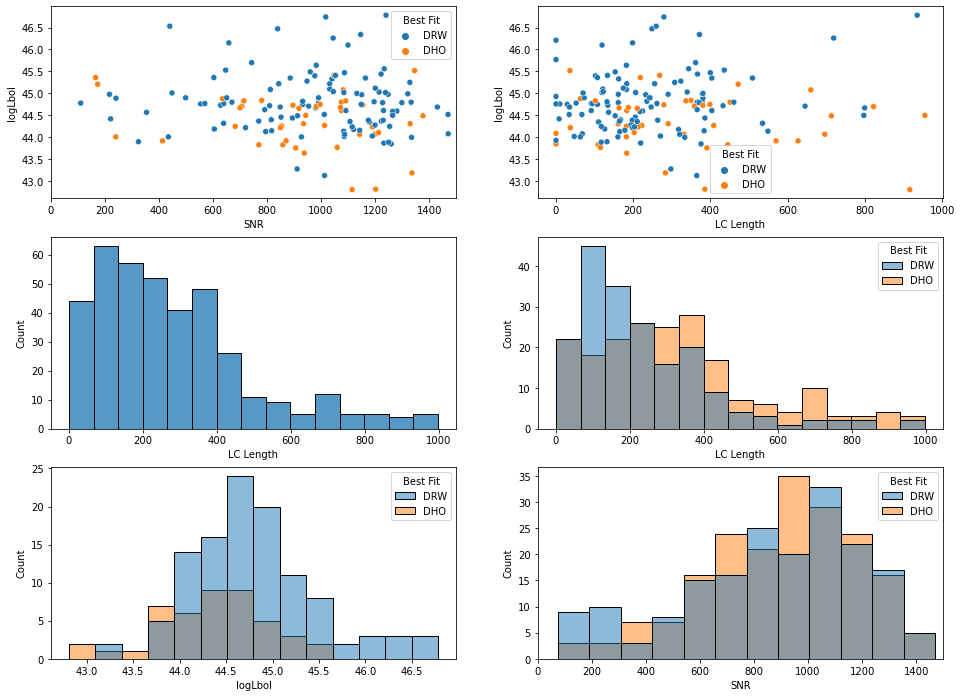

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

########
# line 0
########

# bolometric luminosity vs snr
sns.scatterplot(data=snr_df, x='SNR', y ='logLbol', hue='Best Fit', ax=axs[0,0])
axs[0, 0].set_xlim(0, 1500) 
# note: there are some outliers

# bolometric luminosity vs length
sns.scatterplot(data=snr_df, x='LC Length', y ='logLbol', hue='Best Fit', ax=axs[0,1])

########
# line 1
########

# histogram of length
sns.histplot(data=snr_df, x='LC Length', ax=axs[1,0])

# histogram of length for best fit
sns.histplot(data=snr_df, x='LC Length', hue='Best Fit', ax=axs[1,1])

########
# line 2
########

# histogram of bol luminosity for best fit
sns.histplot(data=snr_df, x='logLbol', hue='Best Fit', ax=axs[2,0])

# histogram of snr for best fit
sns.histplot(data=snr_df, x='SNR', hue='Best Fit', ax=axs[2,1])
axs[2, 1].set_xlim(0, 1500) 
# note: there are some outliers

#plt.savefig('snr-plots.png')